In [2]:
import pandas as pd
from preprocessing_data import full_pipeline_preprocess_data
from triplet_utils import TripletManager, add_triplet_column
from benchmark_data import BenchmarkOutput
data_test_path = '/home/ubuntu/crawl/crawler-recommend-sys/data/sample_0_100_update_test.csv'
data_train_path = '/home/ubuntu/crawl/crawler-recommend-sys/data/sample_0_100_update.csv'

df_train = full_pipeline_preprocess_data(data_train_path)
df_test = full_pipeline_preprocess_data(data_test_path)

triplet_manager = TripletManager().fit(df_train, services_column='services')
df_test = add_triplet_column(df_test, triplet_manager, column_name='triplet')

df_test

,company_lead_name,industry,location,client_size,background,services,project_description,website_outsource_url,services_company_outsource,description_company_outsource,client_min,client_max,linkedin_company_outsource,triplet
0,Automotive Company,Automotive,Indonesia,"10,001+ Employees",BACKGROUNDPlease describe your company and pos...,IT Staff Augmentation,An automotive company has tapped VLink to prov...,https:r.clutch.coredirect?analyticsjs=true&con...,"Custom Software Development, Mobile App Develo...",Transforming Ideas into NextGen Digital Produc...,10001.0,10001.0,https:r.clutch.coredirect?analyticsjs=true&con...,Automotive|||enterprise|||IT Staff Augmentation
1,PT. Bank Danamon tbk.,Banks,"Jakarta, Indonesia","10,001+ Employees",BACKGROUNDPlease describe your company and pos...,IT Managed Services,VLink provides a bank with managed IT services...,https:r.clutch.coredirect?analyticsjs=true&con...,"Custom Software Development, Mobile App Develo...",Transforming Ideas into NextGen Digital Produc...,10001.0,10001.0,https:r.clutch.coredirect?analyticsjs=true&con...,Banks|||enterprise|||IT Managed Services
2,Connecticut Technology Council,Non-profit,"East Hartford, Connecticut",NaN,BACKGROUNDPlease describe your company and pos...,Graphic Design Social Media Marketing,A nonprofit trade association hired VLink to p...,https:r.clutch.coredirect?analyticsjs=true&con...,"Custom Software Development, Mobile App Develo...",Transforming Ideas into NextGen Digital Produc...,NaN,NaN,https:r.clutch.coredirect?analyticsjs=true&con...,Non-profit|||unknown|||Graphic Design Social M...
3,TV Services & Media Company,Telecommunications,"Wiesbaden, Germany",51-200 Employees,BACKGROUNDPlease describe your company and you...,Custom Software Development,*instinctools provides ERP customization for a...,https:r.clutch.coredirect?analyticsjs=true&con...,"Custom Software Development, Web Development, ...",Your AI-powered Engineering Partner*instinctoo...,51.0,200.0,https:r.clutch.coredirect?analyticsjs=true&con...,Telecommunications|||medium|||Custom Software ...
4,Neo Medical SA,Healthcare,Switzerland,51-200 Employees,BACKGROUNDPlease describe your company and pos...,IT Managed Services IT Staff Augmentation,A medical device company hired *instinctools t...,https:r.clutch.coredirect?analyticsjs=true&con...,"Custom Software Development, Web Development, ...",Your AI-powered Engineering Partner*instinctoo...,51.0,200.0,https:r.clutch.coredirect?analyticsjs=true&con...,Healthcare|||medium|||IT Managed Services IT S...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5356,ALTEL/TELE2 Kazakhstan,Telecommunications,"Almaty, Kazakhstan","1,001-5,000 Employees",BACKGROUNDPlease describe your company and pos...,AI Consulting AI Development Cloud Consulting ...,qCloudy developed an AI-powered bot for a mobi...,https:r.clutch.coredirect?analyticsjs=true&con...,Cloud Consulting & SI,Cloud Service Provider / DevOps|DataOps|MLOpsE...,1001.0,5000.0,https:r.clutch.coredirect?analyticsjs=true&con...,Telecommunications|||enterprise|||AI Consultin...
5357,Remoteam Inc,Software,"Lewes, Delaware",1-10 Employees,BACKGROUNDPlease describe your company and you...,Custom Software Development Web Development,qCloudy worked for an online SaaS platform to ...,https:r.clutch.coredirect?analyticsjs=true&con...,Cloud Consulting & SI,Cloud Service Provider / DevOps|DataOps|MLOpsE...,1.0,10.0,https:r.clutch.coredirect?analyticsjs=true&con...,Software|||micro|||Custom Software Development...
5358,Bonhoeffer Publishing,Education,"Baton Rouge, Louisiana",1-10 Employees,BACKGROUNDPlease describe your company and you...,Mobile App Development,A publishing company collaborated with Bitkraf...,https:r.clutch.coredirect?analyticsjs=true&con...,"Custom Software Development, IT Staff Augmenta...",Technokrafting Simplified!Bitkraft Technologie...,1.0,10.0,https:r.clutch.coredirect?analyticsjs=true&con...,Education|||micro|||Mobile App Development
5359,Life Sciences Company,Softwa

In [3]:
data_predict_path = '/home/ubuntu/crawl/crawler-recommend-sys/data/benchmark/recommend_triplet_enhanced_content_1700.csv'
data_predict = pd.read_csv(data_predict_path)
benchmark_exact = BenchmarkOutput(data_predict, df_test)
ans = []
for i in range(1,1700,10):
    summary_exact, per_user_exact = benchmark_exact.evaluate_topk(
        k=i,
        use_partial_match=False
    )
    for i in summary_exact.columns:
        if 'Recall' in i:
            ans.append({'top_k' : i, 'value': summary_exact[i]})

In [4]:
ans

[{'top_k': 'Recall@1',
  'value': 0    0.024828
  Name: Recall@1, dtype: float64},
 {'top_k': 'Recall@11',
  'value': 0    0.118509
  Name: Recall@11, dtype: float64},
 {'top_k': 'Recall@21',
  'value': 0    0.164488
  Name: Recall@21, dtype: float64},
 {'top_k': 'Recall@31',
  'value': 0    0.195398
  Name: Recall@31, dtype: float64},
 {'top_k': 'Recall@41',
  'value': 0    0.221133
  Name: Recall@41, dtype: float64},
 {'top_k': 'Recall@51',
  'value': 0    0.243146
  Name: Recall@51, dtype: float64},
 {'top_k': 'Recall@61',
  'value': 0    0.262527
  Name: Recall@61, dtype: float64},
 {'top_k': 'Recall@71',
  'value': 0    0.277324
  Name: Recall@71, dtype: float64},
 {'top_k': 'Recall@81',
  'value': 0    0.294844
  Name: Recall@81, dtype: float64},
 {'top_k': 'Recall@91',
  'value': 0    0.312228
  Name: Recall@91, dtype: float64},
 {'top_k': 'Recall@101',
  'value': 0    0.325708
  Name: Recall@101, dtype: float64},
 {'top_k': 'Recall@111',
  'value': 0    0.342638
  Name: Recall@

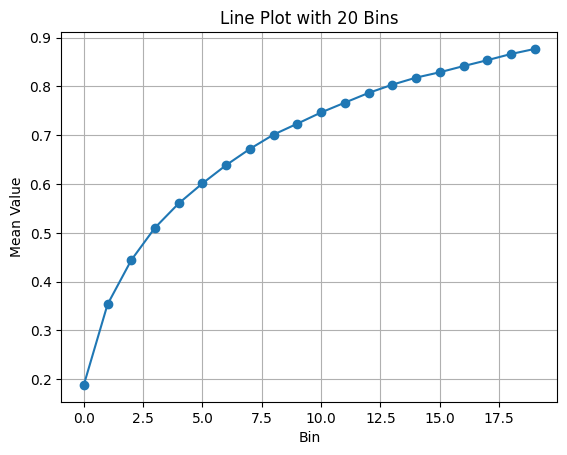

In [6]:
import numpy as np
import matplotlib.pyplot as plt
num_bins = 20
arr = np.array([item['value'] for item in ans])

# Chia dữ liệu thành 10 bins bằng cách nội suy
bins = np.linspace(0, len(arr), num_bins + 1)

# Lấy giá trị trung bình theo mỗi bin
binned_values = []
for i in range(num_bins):
    start = int(bins[i])
    end = int(bins[i+1])
    if start == end:  # Trường hợp không đủ data
        binned_values.append(np.nan)
    else:
        binned_values.append(arr[start:end].mean())

# Plot line plot
plt.plot(range(num_bins), binned_values, marker='o')
plt.xlabel("Bin")
plt.ylabel("Mean Value")
plt.title(f"Line Plot with {num_bins} Bins")
plt.grid(True)
plt.show()

In [ ]:
for i in summary_exact.columns:
    if 'Recall' in i:
        print(i, summary_exact[i])

Recall@100 0    0.324664
Name: Recall@100, dtype: float64
